# Lab 3: Bernoulli processes and Standardized Random Variables

Like the previous lab, we want to put all of our imported packages towards the top of the lab in a cell that's easy to run as needed. This way we have access to all the methods we need right from the start.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
print ("Modules Imported!")

Modules Imported!


## Bernoulli Processes:

In the first lab, you were introduced to both the Bernoulli distribution and the binomial distribution. A *random process* is simply a collection of random variables indexed by time. A Bernoulli process is given by $X=(X_1,X_2, \ldots)$ where $X_t \sim Bernoulli(p)$ for each $t$ and the $X$'s are mutually independent. It is a sequence of Bernoulli RVs. We can calculate probabilities involving the process at multiple times fairly easily, e.g. $P\{X_3=1,X_6=0,X_{11}=1,X_{13}=1\}=p(1-p)pp=p^3(1-p)$. When considering a random process, it is helpful to visualize, or produce by computer simulation, a typical sample path.   A <I> sample path </I> of a random process is the deterministic function of time that results by performing the probability experiment for the underlying probability space, and selecting a realization, or variate, for each of the random variables invovled.   Generating a sample path of a random process by computer simulation is particularly simple in case the random variables of the process are mutually independent, such as for Bernoulli processes.  For such processes, variates of the individual random variables can be generated separately.  Below is a sample path of a Bernoulli process $X=(X_1,X_2, \ldots)$ with p=1/7.  Run the code several times to see different sample paths.

Text(0.5, 0, 'Time')

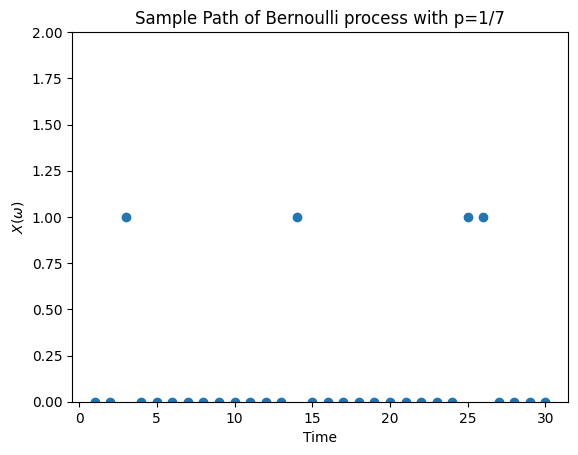

In [2]:
p = 1./7 #Probability
T = 30 #Number of time steps
X = []  #Creates a list for the values of the random variables
for i in range(1,T+1):   #range(1,T+1) is the list of numbers 1 through T
    X.append(st.bernoulli.rvs(p)) #Fills the list with Bernoulli(p) variates
plt.plot(range(1,T+1),X, 'o')
plt.title('Sample Path of Bernoulli process with p=1/7')
plt.ylim((0,2))
plt.ylabel(r'$X(\omega)$') #You can use LaTex in the Python code
plt.xlabel('Time')

The same Bernoulli process can be described in four different ways.
<html>
    <body>
        <ol>
            <li>  Using $X=(X_1,X_2, \ldots)$ as above.
            <li>  Using $L=(L_1,L_2, \ldots),$  where $L_i$ is the number of trials after the $i-1^{th}$ count up to and including the time of the $i^{th}$ count.
            <li>  Using $S=(S_1,S_2, \ldots),$  where $S_i$ is the time the $i^{th}$ count occurs.
            <li>  Using $C = (C_1,C_2,\ldots)$ where $C_t$ is the number of counts up to and including time $t$
        </ol>
    </body>
</html>
(A diagram of each of these representations can be found in your ECE 313 textbook section 2.6)

For example, if 

$X = 0,1,0,1,0,0,1,1,1,0,1$, then 

$L = 2,2,3,1,1,2$

$S = 2,4,7,8,9,11$

$C = 0,1,1,2,2,2,3,4,5,5,6$.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Write an expanded version of the code above to display the sample paths of $X,L,S,$ and $C$ all for the same
realization of the experiment.  To do so, plot the sample paths of $X$ and $C$ up to time 40, and print the
first ten values of $L$ and of $S.$ You don't need to plot $L$ and $S.$  You may need to generate more than
40 X values to determine the first ten values of $L$ and $S.$  To reiterate, your values of $L,S$ and $C$ should be determined by $X.$

(If you just generate a large number of trials assuming it will produce at least 10 values of L and S, you may lose a few points. To prevent this way of generation, consider using a while loop.)

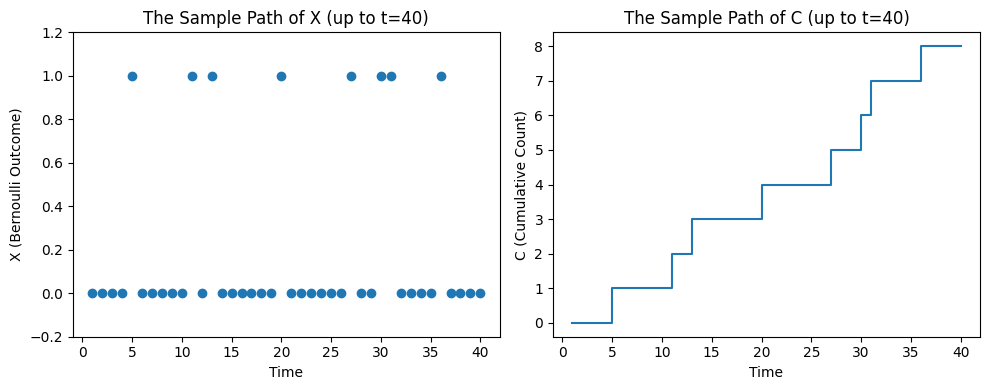

First 10 elements of L: [5, 6, 2, 7, 7, 3, 1, 5, 9, 4]
First 10 elements of S: [5, 11, 13, 20, 27, 30, 31, 36, 45, 49]


In [11]:
########Student Answer##############
p = 1./7
X, C, L, S = [], [], [], []
t = 0
success_count = 0
gap = 0

while (t < 40) or (len(S) < 10):
    t += 1
    x_t = int(st.bernoulli.rvs(p))
    X.append(x_t)
    gap += 1
    if x_t == 1:
        success_count += 1
        L.append(gap)
        S.append(t)
        gap = 0
    C.append(success_count)

times = np.arange(1, 41)
X_plot = X[:40]
C_plot = C[:40]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(times, X_plot, 'o')
plt.ylim(-0.2, 1.2)
plt.title('The Sample Path of X (up to t=40)')
plt.xlabel('Time')
plt.ylabel('X (Bernoulli Outcome)')

plt.subplot(1,2,2)
plt.step(times, C_plot, where='post')
plt.title('The Sample Path of C (up to t=40)')
plt.xlabel('Time')
plt.ylabel('C (Cumulative Count)')
plt.tight_layout()
plt.show()

print("First 10 elements of L:", L[:10])
print("First 10 elements of S:", S[:10])


**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

The equivalent descriptions above suggest another method to simulate a Bernoulli random process.    Each $L_i$ has a geometric distribution with parameter $p,$ and the $L$'s are independent. The geometric distribution is given by its pmf: $p(i)=(1-p)^{i-1}p$ for $i\geq 1.$ For example, the probability that the first count occurs on the third trial is $P\{L_1=3\}= P\{X_1=0,X_2=0,X_3=1\}=(1-p)(1-p)p=(1-p)^2p$ which we determined before.  

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Write new code for simulation of a Bernoulli random process by first generating $L=(L_1, \cdots , L_{40})$ according to a geometric distribution and then generating
$X,S,$ and $C$ from $L.$ Print all values in sequences $L$, $X$, $S$ and $C$. 

In [18]:
########Student Answer##############
p = 1./7
L = st.geom(p).rvs(size=40)
S = np.cumsum(L)
Tmax = S[-1]

X = [0] * Tmax
for s in S:
    X[s-1] = 1
C = np.cumsum(X)

print("L = ", L)
print("S = ", S)
print("X = ", X)
print("C = ", C)

L =  [ 8  3  2  1  2 10  1  3  1 12 12 21  1  2  5  4  5  1  9 12  3  7  2  5
 21  5  5 23 13  3 23  1  7 14  5  1  2 29  3  2]
S =  [  8  11  13  14  16  26  27  30  31  43  55  76  77  79  84  88  93  94
 103 115 118 125 127 132 153 158 163 186 199 202 225 226 233 247 252 253
 255 284 287 289]
X =  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Standardized Random Variables:

A standard random variable is one that has a mean of zero and a variance of one $(\mu=0, \sigma^2=1)$.  If a random variable $Y$ is not standard, then a standard one can be derived from it
by centering and linear rescaling.   The distribution (e.g. pmf) of the standardized version of $Y$ has the same shape as the distribution of $Y$.    We require two things of the standarized version: a mean of zero and a variance of one. If we let $X$ be the standardized form of $Y$ then $X = \frac{Y-\mu_Y}{\sigma_Y},$ where $\mu_Y$ is the mean of $Y$ and $\sigma_Y^2$ is the variance of $Y.$ Let's check this:
\begin{align*}
E[X] & = E\left[\frac{Y-\mu_Y}{\sigma_Y}\right] = \frac{1}{\sigma_y}E[Y-\mu_Y] = \frac{1}{\sigma_Y}(E[Y]-\mu_Y) = 0  \\
\mbox{Var}(X) & = \mbox{Var}\left(\frac{Y-\mu_Y}{\sigma_Y}\right) = \frac{1}{\sigma_Y^2}\mbox{Var}(Y-\mu_Y) = \frac{\mbox{Var}(Y)}{\sigma_Y^2} = 1
\end{align*}

So to standardize any random variable, we simply need to subtract the mean and then divide by the standard deviation. This is useful because if we know the CDF of a standardized version of a random variable we can find the CDF of the original version. For example, suppose $Y$ is a non-standard variable and $X$ is the standardized version of Y, and suppose we want to determine the CDF of Y but only have the CDF of X. We can determine the CDF by the following:

$F_Y(c) = P\{Y \le c\} = P\{Y-\mu_Y \le c-\mu_y\} = P\left\{\frac{Y-\mu_Y}{\sigma_Y} \le \frac{c-\mu_Y}{\sigma_Y}\right\}= P\left\{X \le \frac{c-\mu_Y}{\sigma_Y}\right\}$

Since Python does such a nice job of packaging these distributions, this isn't particularly necessary for our coding purposes. However, when you get to Gaussian distributions in your probability class, you will use this extensively.

$\textbf{Caveat}$: When you do problem 3, be aware of a machine-dependent feature of the .pmf method of a distribution object created by st.rv_discrete, which has caused bugs and confusion for many students before (especially in part 3). The .pmf behaves weirdly for non-integer values. 

In [19]:
c = [1.5, 2.0]
p = [0.5, 0.5]
Z = st.rv_discrete(values=(c,p))
print (Z.pmf(2.0))  # Prints 0.5
print (Z.pmf(1.5))  # Prints 0.5 on some machines, Prints 0.0 on some other machines (e.g. your laptops)

0.5
0.5


This seems to be a design flaw of the scipy library. You are not required to understand it or fix it. Our suggestion is: please avoid using the .pmf method for non-integer values.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>**  To illustrate the standardization procedure, 
<ol>
    <li> For a standard six sided die, imagine a scenario that rolling a number that is equal or bigger than 4 is considered a success. Otherwise it is considered as a failure. You roll the dice 15 times. Create a variable $Y$ that represents the number of successes you achieve in these 15 rounds. Print out the mean and variance of $Y$.     
    <li> Create another random variable $X$, which is a standardized version of $Y$. Print out the mean and variance of $X$
    <li> Plot the pmf of $Y$ and the pmf of $X.$   Up to centering and linear scaling, the pmfs should have the same shape. 
</ol>

Mean of Y: 7.5, Variance of Y: 3.75, Standard Deviation of Y: 1.9364916731037085
Mean of X: 0.0, Variance of X: 0.9999999999999999, Standard Deviation of X: 0.9999999999999999


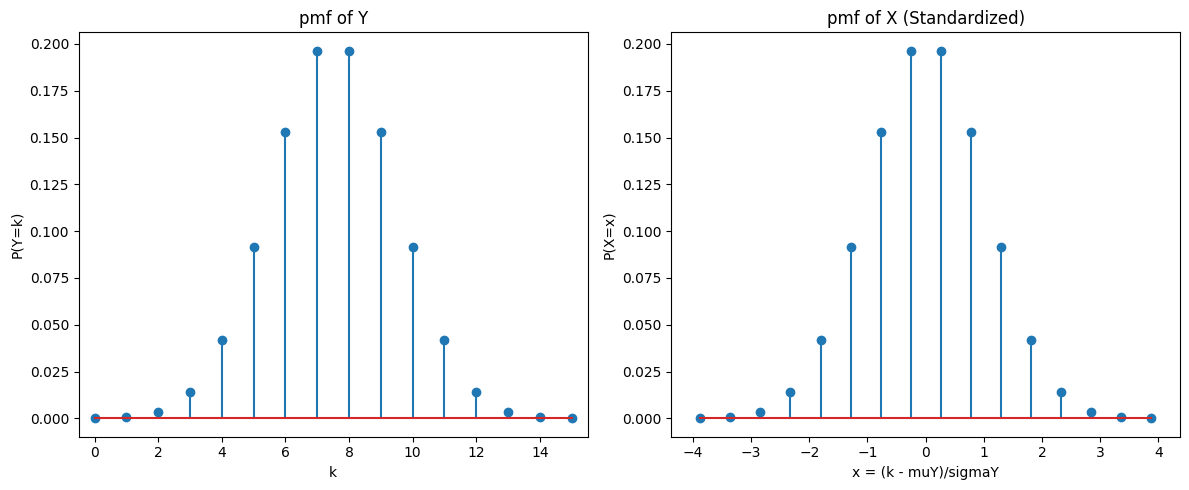

In [22]:
########Student Answer##############
n = 15
p_success = 0.5
k = np.arange(0, n+1)

pY = st.binom.pmf(k, n, p_success)
muY, varY = st.binom.stats(n, p_success)
muY, varY = float(muY), float(varY)
sigmaY = np.sqrt(varY)
print(f"Mean of Y: {muY}, Variance of Y: {varY}, Standard Deviation of Y: {sigmaY}")

X = (k - muY) / sigmaY
muX = np.sum(X * pY)
varX = np.sum((X - muX)**2 * pY)
sigmaX = np.sqrt(varX)
print(f"Mean of X: {muX}, Variance of X: {varX}, Standard Deviation of X: {sigmaX}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# removed use_line_collection argument for compatibility with current matplotlib versions
axes[0].stem(k, pY)
axes[0].set_title('pmf of Y')
axes[0].set_xlabel('k')
axes[0].set_ylabel('P(Y=k)')
axes[0].set_xlim(-0.5, n+0.5)

axes[1].stem(X, pY)
axes[1].set_title('pmf of X (Standardized)')
axes[1].set_xlabel('x = (k - muY)/sigmaY')
axes[1].set_ylabel('P(X=x)')
axes[1].set_xlim(X.min()-0.5, X.max()+0.5)

plt.tight_layout()
plt.show()

__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 